# Problem 2 - Answers

The drag force on a skydiver is of the form

\begin{equation}
  F_{Drag} = -kv^2,
\end{equation}

where $k$ = 0.7kgm$^{-1}$s$^2$ with the parachute closed and k = 30kgm$^{-1}$s$^2$ with the parachute open. The skydiver performs a series of 3 jumps from an altitude of 3000m. To perform the jump safely, the speed of the skydiver must be less than 10m/s when they land.

Use the <samp>scipy.integrate.odeint</samp> function to solve the differential equation describing the sky-diver’s motion. See the Session 4 Advanced Computing Worksheet for help using this function. For each jump listed below plot the altitude and velocity of the skydiver against time and calculate the total time taken for the jump.

## Scenario a)
<strong> The parachute is open for the whole jump </strong>

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

Time that skydiver lands: 521.212


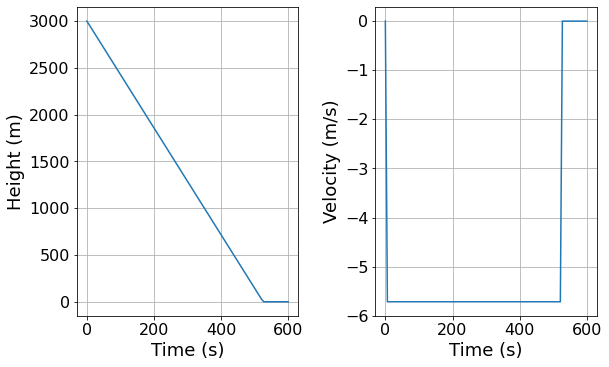

In [2]:
# Define constants
g = -9.8
m = 100  # Or any sensible value
k_diver = 0.7
k_chute = 30
h_start = 3000

# Define function for odeint
def all_chute(variables, t):  # Variables will be a list with the form [x, v]
    dx_dt = variables[1]
    dv_dt = g - np.sign(variables[1]) * (k_chute / m) * variables[1] ** 2  # Drag acts in the opposite direction velocity
    return [dx_dt, dv_dt]

# Set time to solve equations for and initial conditions
t = np.linspace(0, 600, num=100)
initial = [3000, 0]

solution  = odeint(all_chute, initial, t)
trajectory = solution[:, 0]
velocity = solution[:, 1]

# Have velocity become zero when skydiver hits the ground
trajectory_final = np.where(trajectory >= 0 , trajectory, 0)
velocity_final = np.where(trajectory >= 0 , velocity, 0)

# Find time for jump to be completed
t_final = t[np.where(trajectory >= 0)][-1]

print("Time that skydiver lands: %.3f" % t_final)

# Update plot parameters using values suggested in solutions to Session 1 computing worksheet
params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'font.family': 'sans-serif',
   'font.serif': 'Arial',
   'legend.fontsize': 18,
   'xtick.labelsize': 16,
   'ytick.labelsize': 16, 
   'figure.figsize': [8.8, 8.8/1.618]
}

plt.rcParams.update(params)

plt.subplot(1, 2, 1)
plt.grid()
plt.plot(t, trajectory_final)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(t, velocity_final)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.tight_layout()

plt.show()


## Scenario b)
<strong> The jump is performed using a static line 1000 m in length. Therefore the parachute opens when the skydiver is 1000 m below the plane </strong>

Time that skydiver lands: 373.737


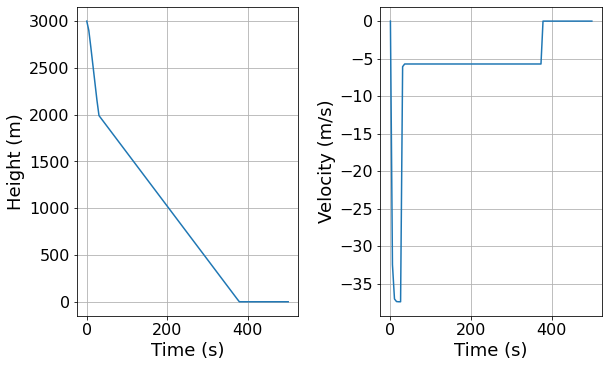

In [3]:
length_of_line = 1000

# Define new function
def static_line(variables, t):  # Variables will be a list with the form [x, v]
    dx_dt = variables[1]
    if variables[0] >= h_start - length_of_line:
        dv_dt = g - np.sign(variables[1]) * (k_diver / m) * variables[1] ** 2  # Drag acts in the opposite direction velocity
    else:
        dv_dt = g - np.sign(variables[1]) * (k_chute / m) * variables[1] ** 2
    return [dx_dt, dv_dt]

# Set time to solve equations for and initial conditions
t = np.linspace(0, 500, num=100)
initial = [3000, 0]

solution  = odeint(static_line, initial, t)
trajectory = solution[:, 0]
velocity = solution[:, 1]

# Have velocity become zero when skydiver hits the ground
trajectory_final = np.where(trajectory >= 0 , trajectory, 0)
velocity_final = np.where(trajectory >= 0 , velocity, 0)

# Find time for jump to be completed
t_final = t[np.where(trajectory >= 0)][-1]

print("Time that skydiver lands: %.3f" % t_final)

# Update plot parameters using values suggested in solutions to Session 1 computing worksheet
params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'font.family': 'sans-serif',
   'font.serif': 'Arial',
   'legend.fontsize': 18,
   'xtick.labelsize': 16,
   'ytick.labelsize': 16, 
   'figure.figsize': [8.8, 8.8/1.618]
}

plt.rcParams.update(params)

plt.subplot(1, 2, 1)
plt.grid()
plt.plot(t, trajectory_final)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(t, velocity_final)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.tight_layout()

plt.show()

## Scenario c)
<strong> The skydiver deploys their parachute to minimise the total time taken for the jump, whilst still landing safely </strong>

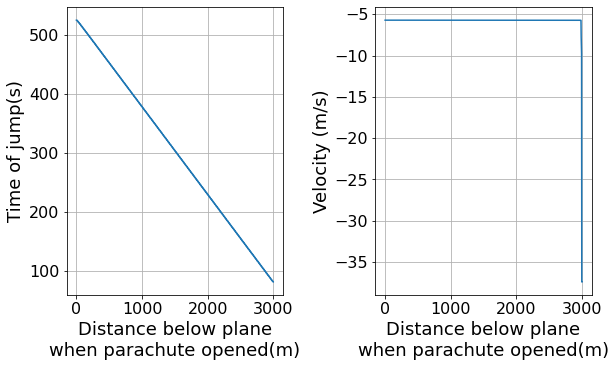

In [4]:
# Define new function
def variable_line(variables, t, h_open):  # Variables will be a list with the form [x, v]
    dx_dt = variables[1]
    if variables[0] >= h_start - h_open:
        dv_dt = g - np.sign(variables[1]) * (k_diver / m) * variables[1] ** 2  # Drag acts in the opposite direction velocity
    else:
        dv_dt = g - np.sign(variables[1]) * (k_chute / m) * variables[1] ** 2
    return [dx_dt, dv_dt]

# Chose range of h_open to try
h_open = np.linspace(0, 3000, num=1000)

# We want to chose h_open to minimise the time before the skydiver lands so we need a place to store t_landing
# We also need to store the final speed to make sure that the landing is safe
t_landing = np.empty(len(h_open))
v_landing = np.empty(len(h_open))

# Chose time interval and initial conditions
t = np.linspace(0, 600, num=500)
initial = [3000, 0]

for i in range(len(h_open)):
    solution  = odeint(variable_line, initial, t, args=(h_open[i],))
    trajectory = solution[:, 0]
    velocity = solution[:, 1]

    # Have velocity become zero when skydiver hits the ground
    trajectory_final = np.where(trajectory >= 0 , trajectory, 0)
    velocity_final = np.where(trajectory >= 0 , velocity, 0)

    # Find time for jump to be completed and velocity at landing
    t_final = t[np.where(trajectory >= 0)][-1]
    v_final = velocity[np.where(trajectory >= 0)][-1]
    
    # Save value of t_final and v_final for later
    t_landing[i] = t_final
    v_landing[i] = v_final

# Update plot parameters using values suggested in solutions to Session 1 computing worksheet
params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'font.family': 'sans-serif',
   'font.serif': 'Arial',
   'legend.fontsize': 18,
   'xtick.labelsize': 16,
   'ytick.labelsize': 16, 
   'figure.figsize': [8.8, 8.8/1.618]
}

plt.rcParams.update(params)

plt.subplot(1, 2, 1)
plt.grid()
plt.plot(h_open, t_landing)
plt.xlabel("Distance below plane\nwhen parachute opened(m)")
plt.ylabel("Time of jump(s)")

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(h_open, v_landing)
plt.xlabel("Distance below plane\nwhen parachute opened(m)")
plt.ylabel("Velocity (m/s)")

plt.tight_layout()

plt.show()


From the left hand graph we can see that time of the jump is minimised by opening the parachute as close to the ground as possible. Therefore we need to find the largest distance below the plane where the final speed of the skydiver is less than 10 m/s.

In [5]:
# Find latest trajectory where the final velocity of the skydiver is less than 10 m/s
index_of_fastest_trajectory = np.where(v_landing > -10)[-1][-1] # Remeber velocity is downwards
t_fastest = t_landing[index_of_fastest_trajectory]
v_fastest = v_landing[index_of_fastest_trajectory]

print("The shortest time in which the skydiver can safely complete the jump is %.3f" % t_fastest) 
print("The skydiver lands with a velocity of %.3f" % v_fastest)

The shortest time in which the skydiver can safely complete the jump is 82.966
The skydiver lands with a velocity of -9.758
